In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#I made a python dictionary containing all the sheets of the BPD report excel file. Each key is a sheet name and each value is a dataframe of the sheet.
ot_records_s1 = pd.read_excel('/Users/danieldoh/Desktop/XC410/newtrypolicerecs.xlsx', engine= 'openpyxl', sheet_name= None)

In [23]:
#See how each key corresponds to a time frame. That's because each time frame was its own sheet in the excel file.
ot_records_s1.keys()

dict_keys(['Jan 1 - Mar 31 2019', 'Apr 1 - Jun 30 2019', 'Jul 1 - Sept 30 2019', 'Oct 1 - Dec 31 2019', 'Jan 1 - Mar 31 2020', 'Apr 1 - Jun 30 2020', 'Jul 1 - Sept 30 2020', 'Oct 1 - Dec 31 2020', 'Jan 1 - Mar 31 2021', 'Apr 1 - Jun 30 2021', 'Jul 1 - Sept 30 2021', 'Oct 1 - Dec 31 2021', 'Jan 1 to present 2022'])

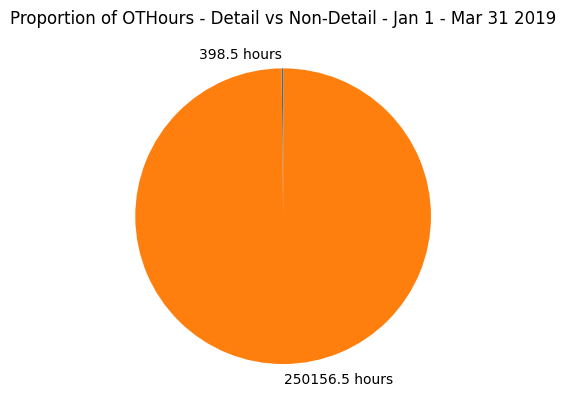

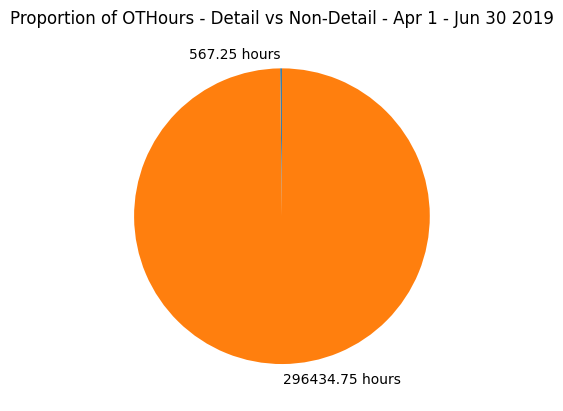

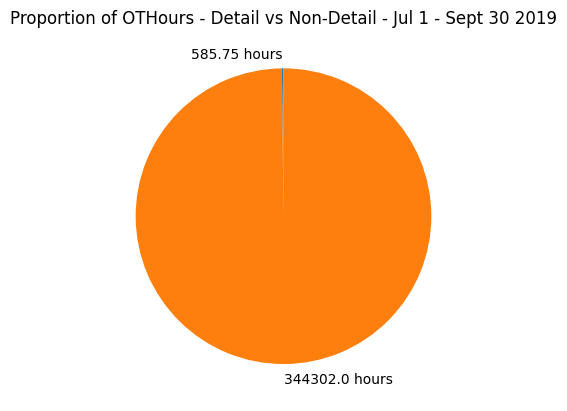

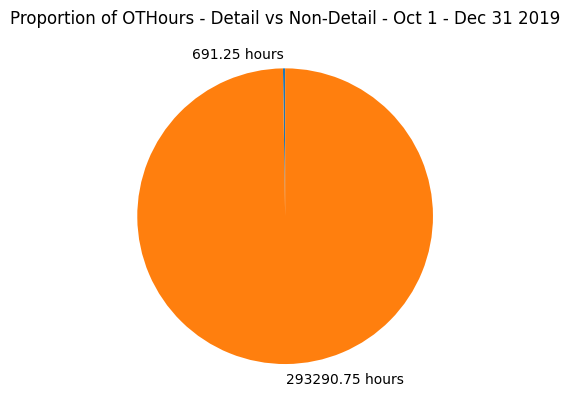

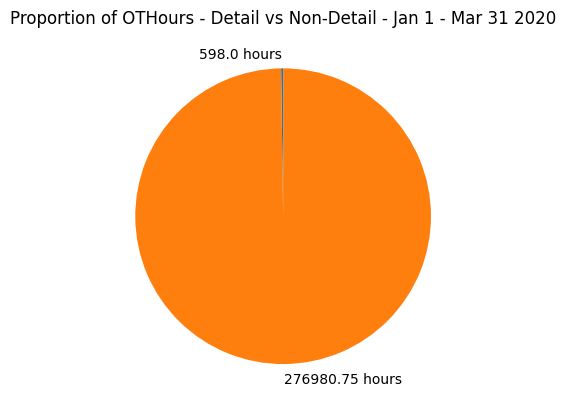

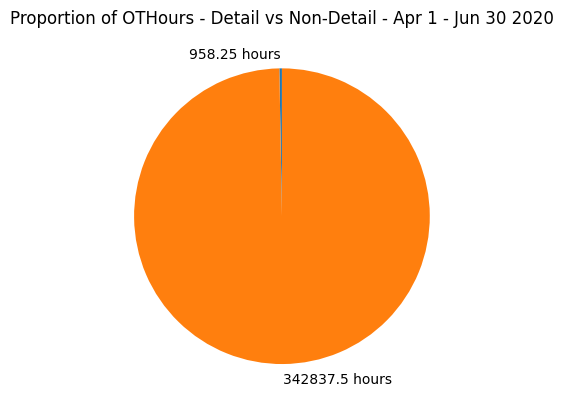

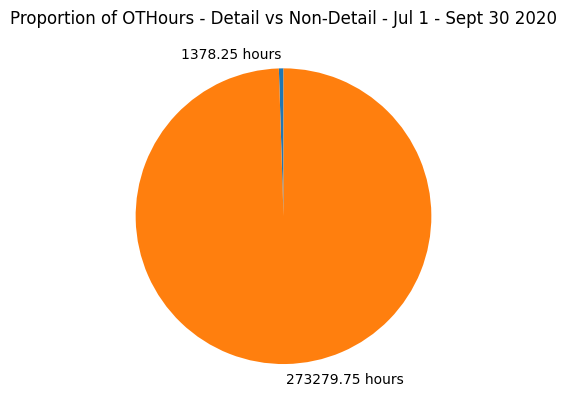

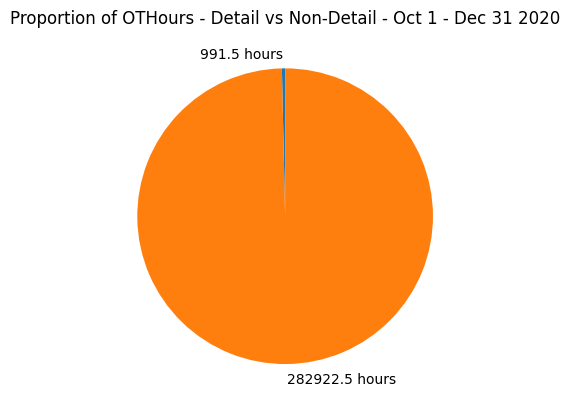

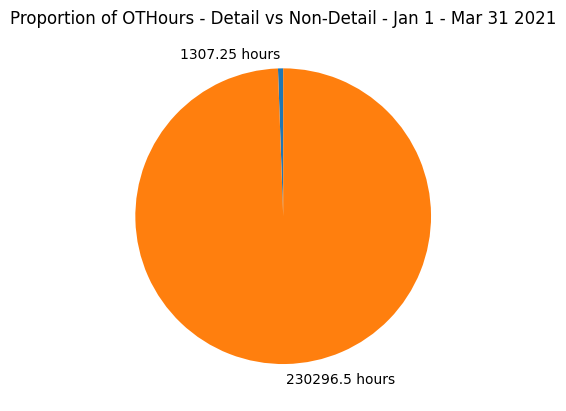

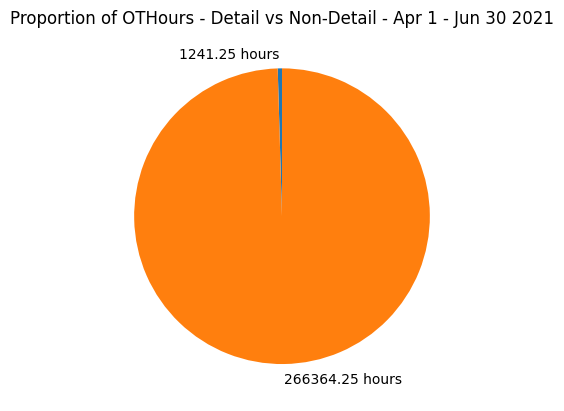

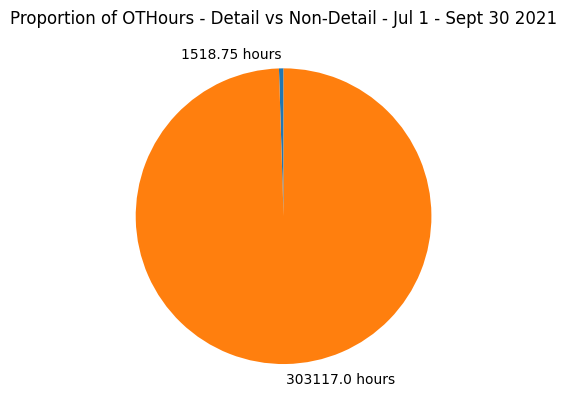

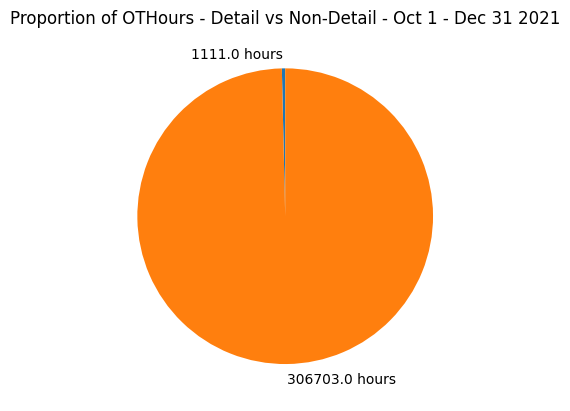

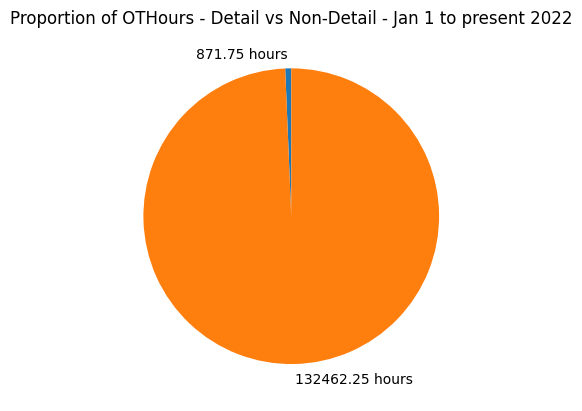

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# I iterate through each sheet and create pie chart
for sheet_name, df in ot_records_s1.items():
    # I create a new column indicating whether "detail" is present in "Charged_Desc"
    df['IsDetail'] = df['CHARGED_DESC'].str.contains('detail', case=False)

    # we calculate the sum of OTHours for rows with "detail" and without "detail"
    detail_hours = df[df['IsDetail']]['OTHOURS'].sum()
    non_detail_hours = df[~df['IsDetail']]['OTHOURS'].sum()
    labels = ['Detail', 'Non-Detail']
    hours = [detail_hours, non_detail_hours]

    fig, ax = plt.subplots() 

  
    wedges, texts, autotexts = ax.pie(hours, labels=labels, autopct='%1.1f%%', startangle=90)

    for text, autotext, hour in zip(texts, autotexts, hours):
        text.set_text(f'{hour} hours')
        autotext.set_text('')  # Clear autopct text, we've set our own

    ax.set_title(f'Proportion of OTHours - Detail vs Non-Detail - {sheet_name}')

plt.show()


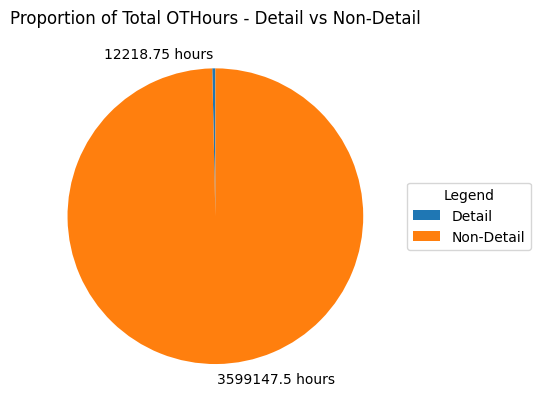

In [7]:

total_detail_hours = 0
total_non_detail_hours = 0

# Now iterating through each sheet and accumulating the total hours
for sheet_name, df in ot_records_s1.items():
    # Create a new column indicating whether "detail" is present in "CHARGED_DESC"
    df['IsDetail'] = df['CHARGED_DESC'].str.contains('detail', case=False)

    # Calculate the sum of OTHOURS for rows with "detail" and without "detail"
    detail_hours = df[df['IsDetail']]['OTHOURS'].sum()
    non_detail_hours = df[~df['IsDetail']]['OTHOURS'].sum()

    # Accumulate total hours
    total_detail_hours += detail_hours
    total_non_detail_hours += non_detail_hours

# Combine total hours for the pie chart
labels = ['Detail', 'Non-Detail']
hours = [total_detail_hours, total_non_detail_hours]

# Using different colors than the other graphs
# colors = ['#FF9999', '#66B2FF']

# Create a pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(hours, labels=labels, autopct='%1.1f%%', startangle=90)

for text, autotext, hour in zip(texts, autotexts, hours):
    text.set_text(f'{hour} hours')
    autotext.set_text('') 

# Add legend
ax.legend(labels, title="Legend", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Proportion of Total OTHours - Detail vs Non-Detail')

plt.show()


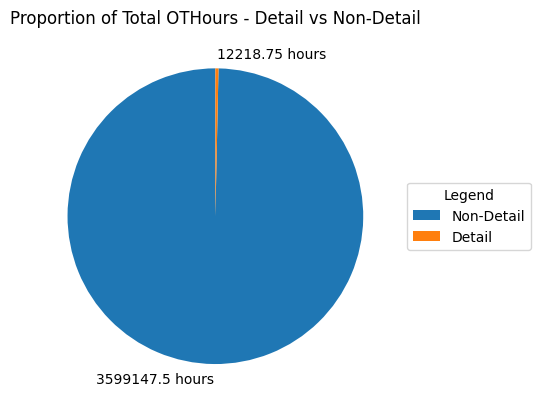

In [14]:
import matplotlib.pyplot as plt

total_detail_hours = 0
total_non_detail_hours = 0

# Now iterating through each sheet and accumulating the total hours
for sheet_name, df in ot_records_s1.items():
    # Create a new column indicating whether "detail" is present in "CHARGED_DESC"
    df['IsDetail'] = df['CHARGED_DESC'].str.contains('detail', case=False)

    # Calculate the sum of OTHOURS for rows with "detail" and without "detail"
    detail_hours = df[df['IsDetail']]['OTHOURS'].sum()
    non_detail_hours = df[~df['IsDetail']]['OTHOURS'].sum()

    # Accumulate total hours
    total_detail_hours += detail_hours
    total_non_detail_hours += non_detail_hours

# Combine total hours for the pie chart
labels = ['Non-Detail', 'Detail']  # Switched the order
hours = [total_non_detail_hours, total_detail_hours]  # Switched the order

# Use default colors
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(hours, labels=labels, autopct='%1.1f%%', startangle=90)

for text, autotext, hour in zip(texts, autotexts, hours):
    text.set_text(f'{hour} hours')
    autotext.set_text('') 

# Add legend
ax.legend(labels, title="Legend", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Proportion of Total OTHours - Detail vs Non-Detail')

plt.show()




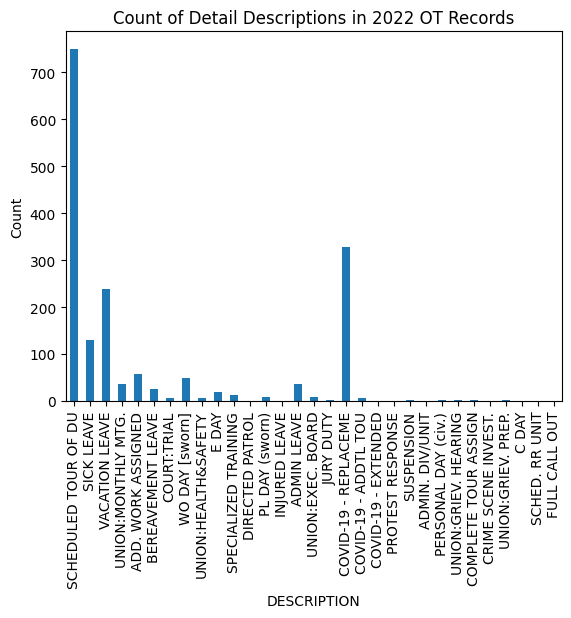

In [15]:

description_counts = {}

# Iterate through each sheet and accumulate counts
for sheet_name, df in ot_records_s1.items():
    
    detail_rows = df[df['CHARGED_DESC'].str.contains('DETAIL', case=False)]
    description_counts_sheet = detail_rows['DESCRIPTION'].value_counts().to_dict()
    
    for key, value in description_counts_sheet.items():
        description_counts[key] = description_counts.get(key, 0) + value
        
description_df = pd.DataFrame(list(description_counts.items()), columns=['DESCRIPTION', 'Count'])


description_df.plot(kind='bar', x='DESCRIPTION', y='Count', legend=False)
plt.title('Count of Detail Descriptions in 2022 OT Records')
plt.xlabel('DESCRIPTION')
plt.ylabel('Count')
plt.show()


In [24]:
detail_2022 = pd.read_excel('/Users/danieldoh/Downloads/2022-FULL_Detail_B000400-020823 (1).xlsx')

In [6]:
detail_2022

,RowId,Tracking_No,Emp_No,Emp_Name,Emp_Rank,Emp_Org_Code,District_Worked,Customer_No,Customer_Seq,Customer_No_And_Seq,...,Hours_Worked,Detail_Type,Detail_Rank,Admin_Fee_Flag,Pay_Hours,Pay_Amount,Pay_TRC_Code,Pay_Rate,FBK_Pay_Date,Total_Pay_Rank
0,730807,2206472,11173,"HARDY,JOHN J",5,41070.0,7,99163,1,00099163-1,...,830,C,5,N,900,495,P05DC,55,2020-01-10,NaN
1,730828,2206484,9755,"HORTON,JOSEPH R",5,45130.0,13,99163,1,00099163-1,...,830,C,5,N,900,495,P05DC,55,2020-01-10,NaN
2,730831,2206473,11612,"HYNES,JOHN F",7,43060.0,6,99163,1,00099163-1,...,830,C,7,N,900,477,P07DC,53,2020-01-10,NaN
3,730970,2207457,10745,"WILSON,MICHAEL C",9,11060.0,1,95347,1,095347-1,...,515,C,9,Y,800,368,P09DC,46,2020-01-17,NaN
4,731041,2210719,12130,"MARANDO,SHAWN P",9,41070.0,7,97297,1,097297-1,...,500,C,9,Y,800,368,P09DC,46,2020-01-17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205963,940382,2646664,123205,"DADDIECO,VENCENZIO",9,42030.0,14,93545,1,093545-1,...,500,S,9,Y,500,230,P09DI,46,2023-01-20,NaN
205964,940716,2632974,86221,"LAI,THUAN D",9,43110.0,13,99164,1,00099164-1,...,345,S,9,Y,400,184,P09DI,46,2023-01-20,NaN
205965,942495,2632980,11740,"SULLIVAN,CARLA",8,25000.0,1,2838,1,002838-1,...,500,C,8,Y,800,368,P08DC,46,2023-01-27,NaN
205966,944142,2649499,140311,"LEAHY,DENNIS J",9,47110.0,15,682,1,000682-1,...,130,S,9,Y,400,184,P09DI,46,2023-02-03,NaN


In [18]:
detail_2022['Emp_Rank'] = detail_2022['Emp_Rank'].replace(9, "Police Officer")

detail_2022['Emp_Rank'] = detail_2022['Emp_Rank'].replace(8, "Police Detective")
detail_2022['Emp_Rank'] = detail_2022['Emp_Rank'].replace(7, "Police Sergeant")

detail_2022['Emp_Rank'] = detail_2022['Emp_Rank'].replace(6, "Police Sergeant (Det)")
detail_2022['Emp_Rank'] = detail_2022['Emp_Rank'].replace(5, "Police Offc Comm Serv Offc 38")

In [25]:
detail_2022['Paid_Hours'] = detail_2022['Pay_Hours'] // 100 + (detail_2022['Pay_Hours'] % 100) / 60
total_paid_hours = detail_2022['Paid_Hours'].sum()
print("Total Paid Hours:", total_paid_hours)


Total Paid Hours: 1521755.0


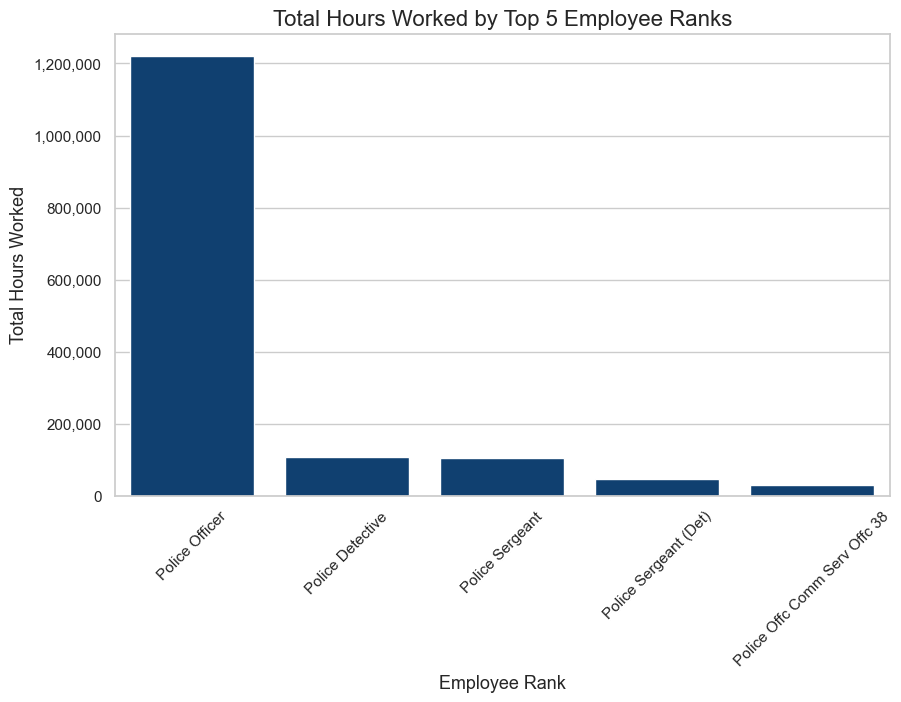

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have a DataFrame named detail_2022
detail_2022['Paid_Hours'] = (detail_2022['Pay_Hours'] // 100) + (detail_2022['Pay_Hours'] % 100) / 60
total_hours_per_rank = detail_2022.groupby('Emp_Rank')['Paid_Hours'].sum().reset_index()
total_hours_per_rank = total_hours_per_rank.sort_values('Paid_Hours', ascending=False)

# Keep only the top 5 ranks
top_5_ranks = total_hours_per_rank.head(5)

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Use a darker blue color
ax = sns.barplot(x='Emp_Rank', y='Paid_Hours', data=top_5_ranks, color='#004080')

ax.set_yticks(np.arange(0, 1220000, 200000))  # Set y-axis ticks
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))

plt.xlabel('Employee Rank', fontsize=13)
plt.ylabel('Total Hours Worked', fontsize=13)
plt.title('Total Hours Worked by Top 5 Employee Ranks', fontsize=16)
plt.xticks(rotation=45)
plt.show()


In [11]:
salary_2022 = pd.read_excel('/Users/danieldoh/Desktop/XC410/2022bpdonly_sal.xlsx')


In [35]:
salary_2022

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_ GROSS,POSTAL
0,"Gavin,Donna M.",Boston Police Department,Police Lieutenant (Det),53226.90,NaN,1045845.44,463.52,NaN,NaN,12812.39,1112348.25,2186
1,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),145775.26,NaN,13932.92,196515.25,NaN,11880.0,29155.26,397258.69,2052
2,"Smith,Sean P",Boston Police Department,Police Lieutenant,142535.62,NaN,18827.45,142692.38,NaN,46365.0,35633.88,386054.33,2186
3,"McCormick,Kelley J",Boston Police Department,Police Captain,147690.64,NaN,7452.73,83593.06,16410.06,78060.0,41025.08,374231.57,2476
4,"Danilecki,John H",Boston Police Department,Police Captain,164100.70,NaN,24504.13,71315.48,NaN,61200.0,41025.08,362145.39,2559
...,...,...,...,...,...,...,...,...,...,...,...,...
2425,"Zirpolo,Vanessa",Boston Police Department,Police Officer,526.70,NaN,NaN,NaN,NaN,NaN,NaN,526.70,2136
2426,"Pontes Da Rosa,Eliane",Boston Police Department,Cadet (Police),445.71,NaN,NaN,NaN,NaN,NaN,NaN,445.71,2124
2427,"Marks,Shalysha Monai",Boston Police Department,Cadet (Police),NaN,NaN,400.00,NaN,NaN,NaN,NaN,400.00,2124
2428,"Barker,Tyreek James",Boston Police Department,Cadet (Police),334.28,NaN,NaN,NaN,NaN,NaN,NaN,334.28,2124


In [12]:
total_salary_detail_rank = salary_2022.groupby('TITLE')['DETAIL'].sum()
# Get the top 5 entries
top_5_entries = total_salary_detail_rank.nlargest(5)

print(top_5_entries)

TITLE
Police Officer                    15655386.0
Police Detective                   1574350.0
Police Sergeant                    1562344.0
Police Sergeant (Det)               912872.0
Police Offc Comm Serv Offc 3$8      880716.0
Name: DETAIL, dtype: float64


/var/folders/j8/tl0_lbl13hzgnfgmslz4hyfc0000gn/T/ipykernel_36857/3787222995.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Title', y='Total_Detail', data=top_5_titles_df, palette='viridis')


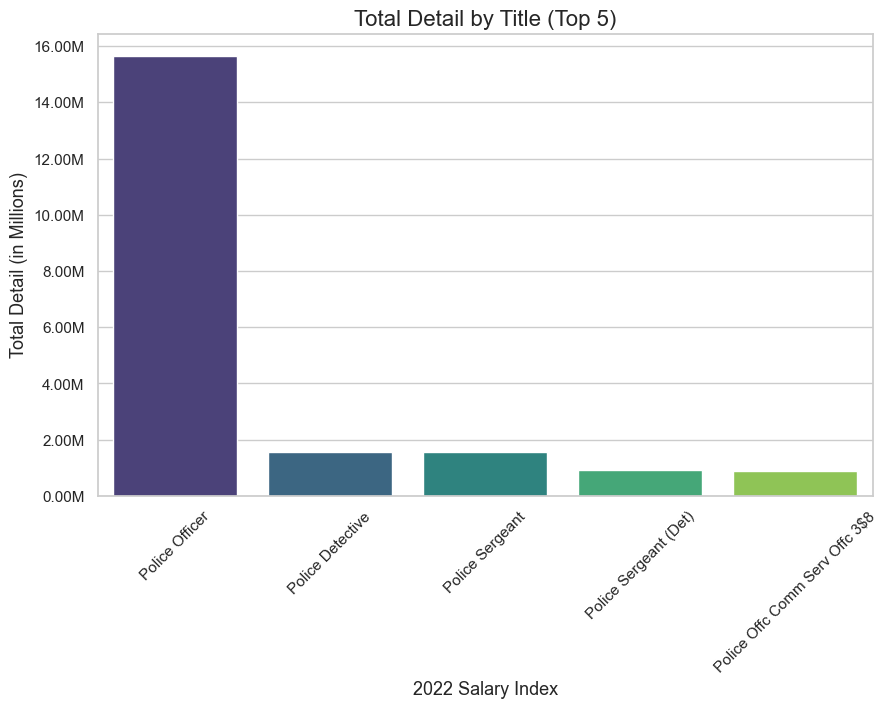

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Assuming 'total_salary_detail_rank_df' is your DataFrame
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Title', y='Total_Detail', data=top_5_titles_df, palette='viridis')

# Format y-axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
plt.xlabel('2022 Salary Index', fontsize=13)
plt.ylabel('Total Detail (in Millions)', fontsize=13)
plt.title('Total Detail by Title (Top 5)', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [26]:
top_5_ranks = total_hours_per_rank.head(5)
print(top_5_ranks)

                        Emp_Rank  Paid_Hours
4                 Police Officer   1221273.0
2               Police Detective    108269.0
5                Police Sergeant    104592.0
6          Police Sergeant (Det)     46651.0
3  Police Offc Comm Serv Offc 38     28707.0
